# Équation de Poisson à deux dimensions

In [1]:
# Modules à importer au préalable avant d'exécuter tout code

import numpy as np
import math
import matplotlib.pylab as plt
from mpl_toolkits import mplot3d

## I. Position du problème

<font color={red}> Le but de ce projet est de résoudre l'équation de Poisson $(\mathcal{P})$ à deux dimensions, grâce à la méthode des différences finies en analyse numérique : </font>
$$
(\mathcal{P}) : \vec \nabla.(a(x,y)\vec \nabla u(x,y)) = b(x,y)
$$

avec : $$a(x,y)=1$$ et : $$b(x,y)=-\pi^2 (k^2+\ell^2) \mathrm{sin}(\pi kx)\mathrm{sin}(\pi\ell y)$$

sur un domaine $\Omega\subset \mathbb{R}^2$ tel que $\Omega=[0,1]\times[0,1]$. On impose une condition aux limites de type Dirichlet aux bords du domaine : 

$$u(x,y)=0$$

La solution exacte de ce problème est donnée sous la forme :

$$u_{k\ell}(x,y)=\mathrm{sin}(\pi kx)\mathrm{sin}(\pi \ell y)$$

## II. Application de la méthode des différences finies à $(\mathcal{P})$

### • Une première simplification ...

Avec $a(x,y)=1$, il vient : $$\Delta u(x,y)=b(x,y)$$

$b$ étant connu. Donc :

$$ \dfrac{\partial ^2 u}{\partial x^2}(x,y) + \dfrac{\partial^2 u}{\partial y^2}(x,y)=b(x,y)$$

### • Mise en oeuvre de la discrétisation

La **méthode des différences finies** consiste à limiter le nombre de points où la solution $u$ du problème sera calculée. 
Pour cela, nous allons chercher à approcher $u$ aux noeuds d'un maillage carré.
Soit $M_{ij}$ un point de ce maillage, de coordonnées $(x_i,y_j)$, tels que les pas de discrétisation en espace $\Delta x$ et $\Delta y$ selon les directions $x$ et $y$ soient donnés par les relations :

$$ x_i=i\Delta x=\dfrac{i}{N}, 1\leq i\leq N$$

et : 

$$ y_j=j\Delta y=\dfrac{j}{N}, 1\leq j\leq N$$

Au point $M_{ij}$, le problème $(\mathcal{P})$ s'écrit :

$$ \dfrac{\partial ^2 u}{\partial x^2}(x_i,y_i) + \dfrac{\partial^2 u}{\partial y^2}(x_i,y_i)=b(x_i,y_i)$$

$u$ est une fonction suffisamment régulière, qu'on considère de classe $\mathcal{C}^\infty$. Écrivons les développements limités à l'ordre $2$ des quantités suivantes :

$$u(x+\Delta x,y) = u(x,y)+\Delta x \dfrac{\partial u}{\partial x}(x,y)+ \dfrac{\Delta x^2}{2}\dfrac{\partial^2 u}{\partial x^2}(x,y)+o(\Delta x^2)$$

$$u(x-\Delta x,y) = u(x,y)-\Delta x \dfrac{\partial u}{\partial x}(x,y)+ \dfrac{\Delta x^2}{2}\dfrac{\partial^2 u}{\partial x^2}(x,y)+o(\Delta x^2)$$

Par somme, il vient :

$$\dfrac{\partial^2 u}{\partial x^2}(x,y)=\dfrac{u(x+\Delta x,y)+u(x-\Delta x,y)-2u(x,y)}{\Delta x^2}+o(\Delta x^2)\qquad (5555)$$

En effectuant le même raisonnement pour la dérivée seconde selon $y$, il vient :

$$\dfrac{\partial^2 u}{\partial y^2}(x,y)=\dfrac{u(x,y+\Delta y)+u(x,y-\Delta y)-2u(x,y)}{\Delta y^2}+o(\Delta y^2)$$

En rassemblant le tout :

$$\dfrac{u(x+\Delta x,y)+u(x-\Delta x,y)-2u(x,y)}{\Delta x^2}+\dfrac{u(x,y+\Delta y)+u(x,y-\Delta y)-2u(x,y)}{\Delta y^2}+o(\Delta x^2)+o(\Delta y^2)=b(x,y) \qquad (51)$$

Notons $\tilde u_{i,j}$ une approximation de la solution au point $M_{ij}$ :

$$\tilde u_{i,j}=u(x_i,y_j) \qquad (5556)$$

Pour le second membre, on note : $ b_{i,j}=b(x_i,y_j)$.

Ainsi, le problème $(\mathcal{P})$ discrétisé s'écrit :

$$(\mathcal{P}^{\mathrm{dis}}) : \dfrac{\tilde u_{i+1,j}+\tilde u_{i-1,j}-2\tilde u_{i,j}}{\Delta x^2}+\dfrac{\tilde u_{i,j+1}+\tilde u_{i,j-1}-2\tilde u_{i,j}}{\Delta y^2}=b_{i,j}$$ 

### • ... et une seconde simplification

En considérant que les pas de discrétisation en espace $\Delta x$ et $\Delta y$ sont égaux, définissons $\Delta$ comme l'unique pas de discrétisation en espace. Le problème discrétisé $(\mathcal{P}^{\mathrm{dis}})$ se simplifie comme :

$$ \tilde u_{i+1,j}+\tilde u_{i-1,j}+\tilde u_{i,j+1}+\tilde u_{i,j-1}-4\tilde u_{i,j}=\Delta^2 b_{i,j}\qquad (57)$$

pour un point $(i,j)$ à l'intérieur du maillage. 

### • Discrétisation de la condition aux limites

La condition aux limites $u=0$ aux bords du domaine devient, sous forme discrétisée : $\tilde u_{i,j}=0$ pour un point $(i,j)$ aux bords du maillage.

## III. Et l'algèbre linéaire dans tout ça ?

Partons de :

$$ \tilde u_{i+1,j}+\tilde u_{i-1,j}+\tilde u_{i,j+1}+\tilde u_{i,j-1}-4\tilde u_{i,j}=\Delta^2 b_{i,j}$$

Soit $X$ le vecteur colonne constitué des $N$ points du maillage, rangés par lignes successives. Alors, on peut considérer ce problème $(\mathcal{P}^{\mathrm{dis}})$ comme étant équivalent à un système linéaire à $N$ inconnues, de forme $LX =b$.

## IV. Premiers codes

### • Création du maillage

Commençons tout d'abord par créer un maillage carré, de domaine $\Omega = [0,1]\times[0,1]$.

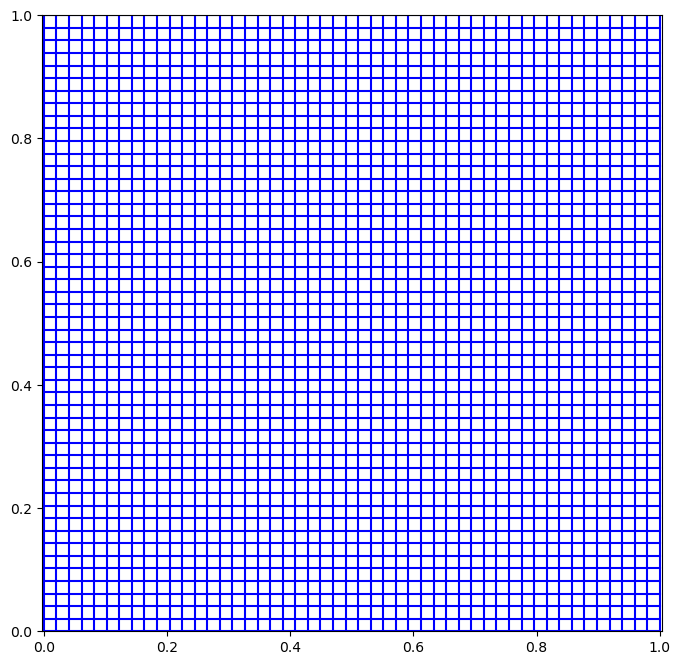

FIGURE 1 - Maillage carré de dimension 50x50 sur [0,1]²


In [2]:
m = 50
n = 50
x = np.linspace(0, 1, num = m)
y = np.linspace(0, 1, num = n)
delta = 1/(m-1)

plt.figure(figsize = (8,8))
X, Y = np.meshgrid(x, y)
plt.plot(X, Y, 'b-')
plt.plot(X.T, Y.T, 'b-')
plt.axis('equal')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

print("FIGURE 1 - Maillage carré de dimension 50x50 sur [0,1]²")

### • Tracé de la solution exacte

Une chose intéressante que nous pouvons faire est de voir à quoi ressemble la solution exacte $u_{k\ell}$. Nous la notons ``u_exact``. Pour $k=1$ et $\ell =1$, il vient :

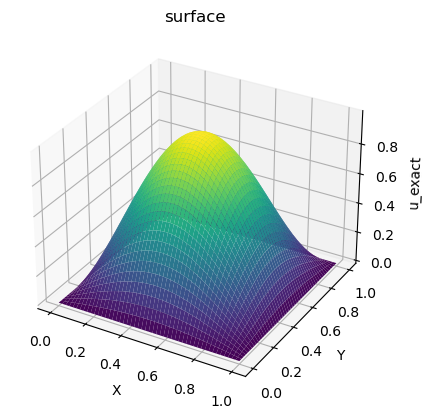

FIGURE 2 - Allure de la solution exacte, avec k = l = 1


In [3]:
k = 1
l = 1

u_exact = np.sin((np.pi)*k*X)*np.sin((np.pi)*l*Y)
ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, u_exact, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
ax.set_title('surface');
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('u_exact')
plt.show()

print("FIGURE 2 - Allure de la solution exacte, avec k = l = 1")

### • Introduction d'une condition initiale d'itération

Choisissons $u^{(0)}(x,y)=0$ pour condition initiale du schéma itératif. Nous la notons ``u_0`` :

In [4]:
s = (n,m)
u_0 = np.zeros(s)

### • Évaluation du second membre

On peut également s'intéresser au tracé du second membre ``b`` du problème $\mathcal{(P)}$ : 

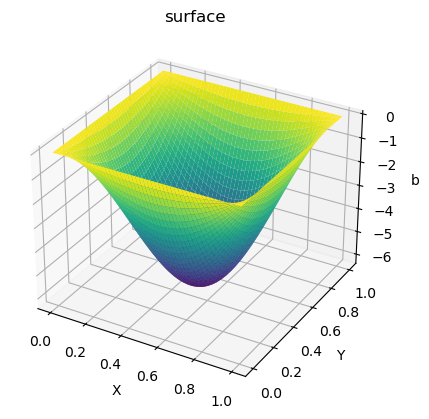

FIGURE 3 - Allure du second membre, avec k = l = 1


In [5]:
b = - np.pi*(k**2+l**2)*np.sin(np.pi*k*X)*np.sin(np.pi*l*Y)
ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, b, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
ax.set_title('surface');
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('b')
plt.show()

print("FIGURE 3 - Allure du second membre, avec k = l = 1")

## V. Quelles méthodes de résolution ? 

*Cette partie n'a pas pour vocation de démontrer les méthodes, mais de rappeler quelques résultats. Certaines affirmations seront admises sans plus de détails, ces dernières ayant été étudiées dans l'UE de méthodes numériques en évolution linéaire.*

Grâce à l'UE de méthodes numériques en évolution linéaire, différents outils de résolution sont à notre portée pour résoudre le problème $(\mathcal{P}^{\mathrm{dis}})$.
Ces méthodes sont dites **itératives**, ie. à partir d'une matrice $X^{(0)}$ comportant l'information initiale, l'application d'une relation de récurrence permet de converger vers la solution $X$ du système linéaire $LX = b$.

Si $ L = L_1 - L_2$, le système linéaire devient $ L_1 X = L_2 X + b$. Une solution itérative s'écrit sous la forme :

$$ L_1 X^{(k+1)} = L_2 X^{(k)}+b$$

avec $k = 0,1,2 ...$.

Connaissant $X^{(0)}$, on peut remonter à $X$ par itération. Cependant, il faut que :
- $L$ soit une matrice inversible. Sinon, à chaque itération, il sera nécessaire de résoudre un système d'équations qui peut être aussi difficile que le système original ;
- Les itérations doivent converger rapidement, ie :

$$ \lim\limits_{k \rightarrow \infty} X^{(k)} = X$$

Voici une première méthode itérative, appelée méthode de Jacobi.

### $\leadsto$ Méthode de Jacobi

Le schéma itératif de la méthode de Jacobi s'écrit, en vertu de la relation $\tilde u_{i+1,j}+\tilde u_{i-1,j}+\tilde u_{i,j+1}+\tilde u_{i,j-1}-4\tilde u_{i,j}=\Delta^2 b_{i,j}$ :

$$\tilde u_{i,j} = \dfrac{1}{4}\left[\tilde u_{i+1,j}+\tilde u_{i-1,j}+\tilde u_{i,j+1}+\tilde u_{i,j-1}\right]-\dfrac{\Delta^2}{4}b_{i,j}$$

La relation de récurrence s'en déduit aisément :

$$\tilde u_{i,j}^{(k+1)} = \dfrac{1}{4}\left[\tilde u_{i+1,j}^{(k)}+\tilde u_{i-1,j}^{(k)}+\tilde u_{i,j+1}^{(k)}+\tilde u_{i,j-1}^{(k)}\right]-\dfrac{\Delta^2}{4}b_{i,j}$$

Définissons la fonction ``Jacobi`` permettant de tracer l'allure de la solution à l'aide de la méthode de Jacobi :

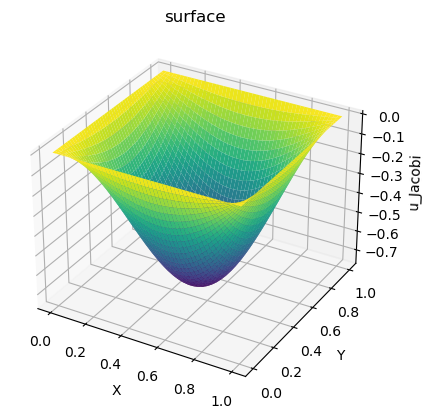

FIGURE 4 - Solution approchée par la méthode de Jacobi


In [6]:
def Jacobi (u_0, b, n, m, delta, kmax):
    utmp = u_0
    s = (n,m)
    u = np.zeros(s)
    
    for k in range(1, kmax+1):
        for i in range(1,n-1): 
            for j in range(1,m-1):
                u[i,j] = (1/4)*(utmp[i+1,j] + utmp[i-1,j] + utmp[i,j+1] + utmp[i,j-1]) - (delta**2/4)*(b[i,j]) 
        utmp = u.copy()
    return u

u_Jacobi = Jacobi(u_0, b, n, m, delta, 700)

ax  = plt.axes(projection = '3d')
ax.plot_surface(X, Y, u_Jacobi - u_exact, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
ax.set_title('surface');
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('u_Jacobi')
plt.show()

print("FIGURE 4 - Solution approchée par la méthode de Jacobi")

La méthode de Jacobi converge bien vers la solution attendue. D'après le schéma itératif, en faisant tendre $k\rightarrow \infty$ pour $X^{(k)}$, la limite obtenue est bien $X$, solution de l'équation $LX=b$, solution approchée de l'équation de Poisson.

#### • Avantages et inconvénients de la méthode de Jacobi

La méthode est très facile à programmer et nous obtenons de bons résultats. Cependant, la complexité de traitement de la méthode est plus importante, compte-tenu qu'à chaque itération, une nouvelle matrice doit être calculée. C'est pourquoi nous allons définir une deuxième méthode de résolution avec une meilleure complexité : la méthode de Gauss-Seidel.

### $\leadsto$ Méthode de Gauss-Seidel

Le schéma itératif de la méthode de Gauss-Seidel diffère légèrement de celui de la méthode de Jacobi : elle est plus économique en calculs, et donc en complexité. En effet, pour chaque noeud $(i,j)$ du maillage, nous avons :

$$\tilde u_{i,j} = \dfrac{1}{4}\left[\tilde u_{i+1,j}+\tilde u_{i-1,j}+\tilde u_{i,j+1}+\tilde u_{i,j-1}\right]-\dfrac{\Delta^2}{4}b_{i,j}$$

Rien de très surprenant jusqu'à présent. 

En parcourant le maillage par lignes successives, on modifie la valeur du point $(i,j)$ :

$$\tilde u_{i,j} \leftarrow \dfrac{1}{4}\left[\tilde u_{i+1,j}+\tilde u_{i-1,j}+\tilde u_{i,j+1}+\tilde u_{i,j-1}\right]-\dfrac{\Delta^2}{4}b_{i,j}$$

En parcourant les lignes, le point $(i,j)$ étudié fait intervenir les points $(i-1,j)$ et $(i,j-1)$ calculés au cours des précédentes itérations. Ainsi, à la $(k+1)$-ième itération, le schéma itératif devient :

$$\tilde u_{i,j}^{(k+1)} = \dfrac{1}{4}\left[\tilde u_{i+1,j}^{(k)}+\tilde u_{i-1,j}^{(k+1)}+\tilde u_{i,j+1}^{(k)}+\tilde u_{i,j-1}^{(k+1)}\right]-\dfrac{\Delta^2}{4}b_{i,j}$$

Définissons la fonction ``GS`` permettant de tracer l'allure de la solution à l'aide de la méthode de Gauss-Seidel :

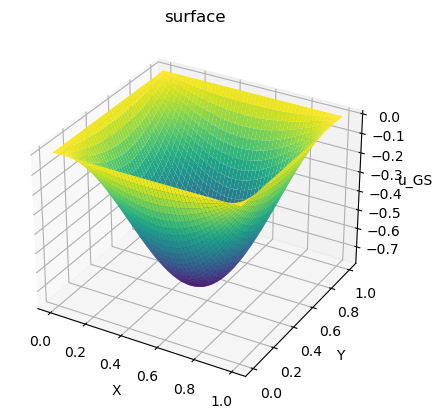

FIGURE 5 - Solution approchée par la méthode de Gauss-Seidel


In [7]:
def GS (u_0, b, n, m, delta, kmax):
    
    u = u_0.copy()
    
    for k in range(1, kmax+1):
        for i in range(1,n-1): 
            for j in range(1,m-1):
                u[i,j] = (1/4)*(u[i+1,j] + u[i-1,j] + u[i,j+1] + u[i,j-1]) - (delta**2/4)*(b[i,j]) 
    return u

u_GS = GS(u_0, b, n, m, delta, 300)

ax  = plt.axes(projection = '3d')
ax.plot_surface(X, Y, u_GS - u_exact, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
ax.set_title('surface');
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('u_GS')
plt.show()

print("FIGURE 5 - Solution approchée par la méthode de Gauss-Seidel")

Là encore, on observe bien la convergence de la méthode de Gauss-Seidel vers la solution attendue. 

#### • Avantages et inconvénients de la méthode de Gauss-Seidel

Cette dernière converge deux fois plus rapidement que la méthode de Jacobi : elle requiert donc deux fois moins d'itérations que pour la méthode de Jacobi. Cependant, ce n'est pas la méthode la plus rapide pour la convergence.
La méthode de Gauss-Seidel avec sur-relaxation (SOR) a une meilleure complexité, c'est notre troisième méthode. 

### $\leadsto$ Méthode de Gauss-Seidel avec sur-relaxation

La méthode de Gauss-Seidel avec sur-relaxation permet d'accroître le taux de convergence de la méthode de Gauss-Seidel via l'introduction d'un paramètre $\omega$ dans le schéma itératif. $\omega$ est appelé paramètre de relaxation.

Le schéma itératif de la méthode de Gauss-Seidel avec sur-relaxation est le suivant :

$$\tilde u_{i,j} \leftarrow (1-\omega) \tilde u_{i,j}+\dfrac{\omega}{4}\left[\tilde u_{i+1,j}+\tilde u_{i-1,j}+\tilde u_{i,j+1}+\tilde u_{i,j-1}\right]-\dfrac{\Delta^2}{4}\omega b_{i,j}$$

Lorsque $\omega=1$, on retrouve les résultats de la méthode de Gauss-Seidel. Pour :
- $0< \omega \leqslant 1$, il y a déccélération de la convergence ;
- $1< \omega <2$, il y a accélération de la convergence : c'est ce cas de figure qui nous intéresse.

La littérature démontre l'existence d'une valeur du paramètre de relaxation où la convergence est optimale :

$$\omega_{\mathrm{opt}} = \dfrac{2}{1+\mathrm{sin}\left(\dfrac{\pi}{N}\right)}$$

où $N$ représente le nombre de noeuds dans une dimension (ici, $N$ est le même selon les directions $x$ ou $y$). Pour un $N$ grand, $\omega\rightarrow 2 $.

Définissons la fonction ``SOR`` permettant de tracer l'allure de la solution à l'aide de la méthode de Gauss-Seidel avec sur-relaxation :

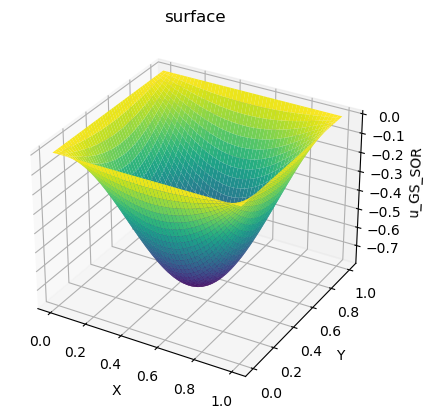

FIGURE 6 - Solution approchée par la méthode de Gauss-Seidel avec sur-relaxation


In [8]:
def SOR (u_0, b, n, m, delta, omega, kmax):
    
    u = u_0.copy()
    s = (n,m)
    u_GS = np.zeros(s)
    
    for k in range(1, kmax+1):
        for i in range(1,n-1): 
            for j in range(1,m-1):
                u_GS[i,j] = (1/4)*(u[i+1,j] + u[i-1,j] + u[i,j+1] + u[i,j-1]) - (delta**2/4)*(b[i,j]) 
                u[i,j] = u[i,j] + omega*(u_GS[i,j] - u[i,j])
    return u

u_GS_SOR = SOR(u_0, b, n, m, delta, 1.7, 50)

ax  = plt.axes(projection = '3d')
ax.plot_surface(X, Y, u_GS_SOR - u_exact, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
ax.set_title('surface');
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('u_GS_SOR')
plt.show()

print("FIGURE 6 - Solution approchée par la méthode de Gauss-Seidel avec sur-relaxation")

Nous pouvons définir une erreur pour chaque méthode :

In [9]:
error_Jacobi = np.sum(np.abs(u_Jacobi - u_exact))/np.sum(u_exact)
error_GS = np.sum(np.abs(u_GS - u_exact))/np.sum(u_exact)
error_GS_SOR = np.sum(np.abs(u_GS_SOR - u_exact))/np.sum(u_exact)

print("L'erreur pour la méthode de Jacobi est de", error_Jacobi)
print("L'erreur pour la méthode de Gauss-Seidel est de", error_GS)
print("L'erreur pour la méthode de Gauss-Seidel avec sur-relaxation est de", error_GS_SOR)

L'erreur pour la méthode de Jacobi est de 0.757045630294652
L'erreur pour la méthode de Gauss-Seidel est de 0.774415681913595
L'erreur pour la méthode de Gauss-Seidel avec sur-relaxation est de 0.781841646505242


On voit que ``error_Jacobi``, ``error_GS`` et ``error_GS_SOR`` ont des valeurs très proches, de l'ordre de 0,75.

Il existe bien d'autres méthodes plus efficaces pour traiter le problème. Citons par exemple la méthode multigrille, qui consiste à utiliser successivement des grilles de tailles variables. Cette méthode étant plus compliquée à coder, nous ne l'aborderons pas dans ce projet. 

## VI. Convergence

La convergence de l'équation $LX= b$, où $L$ est la matrice obtenue par la méthode des différences finies, est basée sur l'approximation de $X$ par méthode itérative : 
- soit $\tilde U=X^{(n)}$ l'approximation de $X$, obtenue après $n$ itérations du schéma itératif ;
- $r$ est appelé résidu :

$$ r = L\tilde U - b $$ 

- Le résidu tend vers $0$ quand l'approximation $\tilde U$ tend vers la solution exacte $X$.

On peut également étudier la convergence en calculant la norme de $X$, définie comme suit :

$$ ||X||_2 = \sqrt{\dfrac{1}{N}\sum_{i,j}X_{i,j}^2}$$

Ainsi, on peut tracer les graphes $f(N)= r$ et $f(N)=||X||_2$ représentant l'évolution du résidu et de la norme en fonction du nombre $N$ d'itérations.

## Bibliographie

Nous remercions nos deux enseignants M. Martin-Witkowski et Mme Sayadi pour nous avoir transmis les outils nécessaires à la résolution de ce projet numérique.

• UE du M1 MF2A en méthodes numériques en évolution linéaire, Laurent Martin Witkowski, Taraneh Sayadi, Sorbonne Université, 2019-2020.

• L'incroyable site internet de Frédéric Legrand (une vraie bible à tous les niveaux, permet une bonne compréhension des méthodes) : https://www.f-legrand.fr/scidoc/docimg/index.html. 